In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from datetime import datetime, timedelta
from tqdm import notebook
from copy import deepcopy
import plotly.express as px
import plotly

In [29]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


# Spread Change Volatility by Credit Rating
## (Exhibit 1)
### trailing 36 months ('10.1.4. ~ '20.8.20.)
 
 * 36 month moving standard deviation
 * AA+, AA-, BBB+, 3 month maturity




In [5]:
find = pd.read_csv('sector_data.csv')

In [8]:
len(find)

711718

In [7]:
len(find['code'].unique())

517

In [87]:
find1 = pd.read_csv('bootstrap_ZCB_ytm.csv', )

In [88]:
find1.index = find1['date']

In [90]:
del find1['date']

In [92]:
find1.columns = ['MAT3', 'MAT6', 'MAT9', 'MAT12', 'MAT18', 'MAT24', 'MAT30', 'MAT36', 'MAT48', 'MAT60', 'MAT84', 'MAT120']

In [93]:
find1

,MAT3,MAT6,MAT9,MAT12,MAT18,MAT24,MAT30,MAT36,MAT48,MAT60,MAT84,MAT120
date,,,,,,,,,,,,
2010-01-01,0.023829,0.029313,0.032909,0.034809,0.039447,0.043723,0.043983,0.044051,0.046757,0.049464,0.052082,0.054700
2010-01-02,0.023829,0.029313,0.032909,0.034809,0.039447,0.043723,0.043983,0.044051,0.046757,0.049464,0.052082,0.054700
2010-01-03,0.023829,0.029313,0.032909,0.034809,0.039447,0.043723,0.043983,0.044051,0.046757,0.049464,0.052082,0.054700
2010-01-04,0.023729,0.029413,0.033109,0.035009,0.039748,0.043921,0.044285,0.044352,0.047222,0.050092,0.052587,0.055083
2010-01-05,0.023332,0.028816,0.032313,0.034212,0.038749,0.042921,0.043287,0.043565,0.046431,0.049297,0.051788,0.054278
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-16,0.004507,0.004797,0.005697,0.005857,0.006368,0.007371,0.007954,0.008275,0.009569,0.011046,0.012477,0.014137
2020-08-17,0.004507,0.004797,0.005697,0.005857,0.006368,0.007371,0.007954,0.008275,0.009569,0.011046,0.012477,0.014137
2020-08-18,0.004517,0.004837,0.005697,0.005867,0.006348,0.007251,0.007803,0.008104,0.009317,0.010691,0.012070,0.013645


In [118]:
histo = pd.read_csv('1020_spread_with_mkwgt.csv')

In [121]:
histo['date'] = pd.to_datetime(histo['date'].astype(str), format = '%Y-%m-%d')

In [127]:
histo['date'].dt.year

0           2010
1           2010
2           2010
3           2010
4           2010
            ... 
38308845    2019
38308846    2019
38308847    2019
38308848    2019
38308849    2019
Name: date, Length: 38308850, dtype: int64

In [136]:
len(histo['code'].loc[histo['date'].dt.year == 2010].unique())

11346

In [150]:
p = []
for year1 in notebook.tqdm(range(2010, 2021)):
    p.append(len(histo['code'].loc[histo['date'].dt.year == year].unique()))
    

In [151]:
p

[15515, 15515, 15515, 15515, 15515, 15515, 15515, 15515, 15515, 15515, 15515]

In [137]:
histdic = {2010:None, 2011:None, 2012:None, 2013:None, 2014:None, 2015:None, 2016:None, 2017:None, 2018:None, 2019:None, 2020:None}

In [139]:
for year in notebook.tqdm(range(2010, 2021)):
    histdic[year] = histo['code'].loc[histo['date'].dt.year == year].unique()
    
    

In [149]:
label = list(histdic)

TypeError: unhashable type: 'numpy.ndarray'

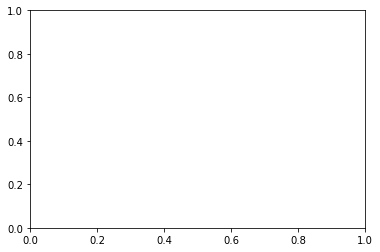

In [148]:
plt.bar(label, )

dict_values([array(['KR3102010088', 'KR31020100B7', 'KR3102010R90', ...,
       'KR61373760C6', 'KR61373770C5', 'KR61373780C4'], dtype=object), array(['KR3102010088', 'KR31020100B7', 'KR3102011060', ...,
       'KR61517721C5', 'KR61517731C4', 'KR61517741C3'], dtype=object), array(['KR3102010088', 'KR31020100B7', 'KR3102011W27', ...,
       'KR616980Z2C2', 'KR61698512C9', 'KR61700512C5'], dtype=object), array(['KR3102010088', 'KR3102014S38', 'KR3102014T11', ...,
       'KR61902073C4', 'KR61902083C3', 'KR61908513C3'], dtype=object), array(['KR3102010088', 'KR3102014S38', 'KR3102014T11', ...,
       'KR621345S4C7', 'KR621345T4C6', 'KR621345V4C2'], dtype=object), array(['KR3102014S38', 'KR3102014T11', 'KR3102017S35', ...,
       'KR62365015C3', 'KR62365215C9', 'KR62365415C5'], dtype=object), array(['KR3102014S38', 'KR3102014T11', 'KR3102017S35', ...,
       'KR62623526C7', 'KR62623616C6', 'KR6CHN021696'], dtype=object), array(['KR3102014T11', 'KR3102017T18', 'KR3102017T42', ...,
       'KR

In [3]:
def spread(rating):
    company = pd.read_excel('credit_ytm.xlsx', index_col = '기준일', sheet_name = rating)
    company.index = pd.DatetimeIndex(company.index.astype(str))
    
    del company['15Y'], company['20Y'] #나중에 데이터 확보시 삭제
    
    free = pd.read_csv('bootstrap_ZCB_ytm.csv', index_col = 'date')
    free.index = pd.DatetimeIndex(free.index.astype(str))
    
    free.columns = company.columns
    
    result = 100 * company - 10000 * free
    
    return result

In [3]:
triA = spread('AAA')
douAp = spread('AA+')
douA = spread('AA0')
douAm = spread('AA-')
triBp = spread('BBB+')
triB = spread('BBB0')
triBm = spread('BBB-')

In [4]:
douAp = spread('AA+')
douAm = spread('AA-')
triBp = spread('BBB+')

In [5]:
month_douAp = douAp.resample('MS').first()
month_douAm = douAm.resample('MS').first()
month_triBp = triBp.resample('MS').first()

In [6]:
a = month_douAp.rolling(36).std()
b = month_douAm.rolling(36).std()
c = month_triBp.rolling(36).std()

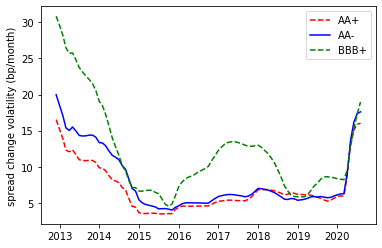

In [20]:
plt.plot(month_douAp.index, a['3M'], 'r--', month_douAm.index, b['3M'], 'b', month_triBp.index, c['3M'], 'g--')
plt.ylabel('spread change volatility (bp/month)')
plt.legend(['AA+', 'AA-', 'BBB+'])

# Spread Change Volatility by Spread Range
## (Exhibit 2) 
### trailing 36 month ('10.1.4. ~ '20.8.20.)

* investment-grade corporate universe partitioned by spread levels
* Duration matching
* Duration이 없는 경우, 만기로 대체 (만기는 issuer_data.xlsx 이용)
* applied rate가 없는 경우, intrinsic rate로 대체 - 다 없는 경우 삭제


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import openpyxl
from datetime import datetime, timedelta
from tqdm import notebook
from statsmodels.formula.api import ols
from copy import deepcopy

In [5]:
def raw(year):
    name = 'price_'+str(year)+'.csv'
    dat = pd.read_csv(name, names = ['date', 'code', 'ytm', 'close', 'D', 'convexity', 
                           'applied rate', 'intrinsic rate', 'high', 'low', 'volume', 'issued price', 'issuer code'])
    #dat.index = dat['date']
    #del dat['date']
    
    #dat.index = pd.to_datetime(dat.index.astype(str), format = '%Y-%m-%d')
    
    dat['date'] = pd.to_datetime(dat['date'].astype(str), format = '%Y-%m-%d')
    dat = dat.sort_values('date')
    
    return dat

In [7]:
test = raw(2010)
for i in notebook.tqdm(range(2011,2021)):
    test = pd.concat([test, raw(i)], ignore_index = True)

C:\Users\belig\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [8]:
test

,date,code,ytm,close,D,convexity,applied rate,intrinsic rate,high,low,volume,issued price,issuer code
0,2010-01-01,KR3804117V97,6.0400,10532.010443,3.633348,15.298615,AA+,NaN,NaN,NaN,NaN,1.118250e+11,D2313
1,2010-01-01,KR3105194V95,5.3200,10920.514992,3.557643,15.864331,AAA,NaN,NaN,NaN,NaN,1.000000e+08,02411
2,2010-01-01,KR3105204V85,5.2900,10979.657376,3.479586,15.210930,AAA,NaN,NaN,NaN,NaN,6.000000e+07,02411
3,2010-01-01,KR3105204V93,5.3200,10920.514992,3.557643,15.864331,AAA,NaN,NaN,NaN,NaN,2.100000e+08,02411
4,2010-01-01,KR3105214V91,5.3200,10920.514992,3.557643,15.864331,AAA,NaN,NaN,NaN,NaN,2.200000e+09,02411
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38809495,2020-08-31,KR6018672537,1.2450,10260.504106,1.476231,2.578270,AA-,AA+,NaN,NaN,NaN,1.000000e+11,01867
38809496,2020-08-31,KR6023781539,1.8190,10736.602843,4.170663,19.322009,AA-,AA-,NaN,NaN,NaN,2.000000e+10,02378
38809497,2020-08-31,KR6017671522,0.9180,10222.349368,1.458469,2.506666,AAA,AAA,NaN,NaN,NaN,1.000000e+11,01767
38809498,2020-08-31,KR6017673528,1.6110,10879.445584,8.449202,78.776251,AAA,AAA,NaN,NaN,NaN,5.000000e+10,01767


In [10]:
len(test['code'].unique())

51847

In [12]:
min(test['date'].astype(int))

TypeError: cannot astype a datetimelike from [datetime64[ns]] to [int32]

In [ ]:
df_figure2 = df_X.iloc[:,:-3]
df_figure2['total'] = df_figure2.sum(axis=1)
df_figure2['group_num_words'] = pd.cut(df_figure2['total'], bins = list(range(0, 740, 10)), right = False)
df_figure2

In [23]:
a = test['code'].groupby(test['applied rate'])

In [25]:
a.size()

applied rate
A+       1999411
A-        955640
A0       1426212
AA+      6815848
AA-      5122509
AA0      2972200
AAA     18121896
B+         26202
B-         31378
B0         38924
BB+        57017
BB-        33043
BB0        49686
BBB+      519988
BBB-       93747
BBB0      279269
C         193160
CC          2602
CCC        44497
Name: code, dtype: int64

In [33]:
b = test['code'].unique()

In [34]:
test[['code', 'applied rate']].iloc[1]

code            KR3105194V95
applied rate             AAA
Name: 1, dtype: object

In [36]:
test[['code', 'applied rate']].loc[test['code'].loc[test['code'] == i] for i in b]

SyntaxError: invalid syntax (<ipython-input-36-14bc1ac817a8>, line 1)

In [42]:
alpha = test[['code', 'applied rate']]

In [46]:
alpha = alpha.drop_duplicates()

In [51]:
len(alpha.drop_duplicates(['code']))

51847

In [52]:
t = alpha.drop_duplicates(['code'])

In [55]:
tplot = t['code'].groupby(t['applied rate'])

In [59]:
tplot.size()

applied rate
A+       2744
A-       1505
A0       1972
AA+      6097
AA-      5781
AA0      3678
AAA     27885
B+         30
B-         44
B0         56
BB+        98
BB-        43
BB0        85
BBB+      856
BBB-      177
BBB0      484
C         222
CC          2
CCC        61
Name: code, dtype: int64

In [60]:
srt = pd.DataFrame(tplot.size())

In [62]:
crit = ['AAA', 'AA+', 'AA0', 'AA-', 'A+', 'A0', 'A-', 'BBB+', 'BBB0', 'BBB-', 'BB+', 'BB0', 'BB-', 'B+', 'B0', 'B-', 'CCC', 'CC', 'C' ]

In [63]:
len(crit)

19

In [68]:
srt['crit'] = crit

In [73]:
rwa = []
for i in crit:
    for j in srt.index:
        if i == j:
            rwa.append(srt['code'].loc[j])
        

In [75]:
srt

,code,crit
applied rate,,
A+,2744,AAA
A-,1505,AA+
A0,1972,AA0
AA+,6097,AA-
AA-,5781,A+
AA0,3678,A0
AAA,27885,A-
B+,30,BBB+
B-,44,BBB0


In [80]:
plt1 = pd.DataFrame(rwa, index = crit)

In [82]:
plt1

,0
AAA,27885
AA+,6097
AA0,3678
AA-,5781
A+,2744
A0,1972
A-,1505
BBB+,856
BBB0,484
BBB-,177


In [49]:
len(alpha['code'].unique())

51847

In [38]:
test.index

RangeIndex(start=0, stop=38809500, step=1)

In [86]:
fig = px.bar(plt1, height = 400)
fig.show()

In [ ]:
hist1 = pd.DataFrame(df_figure2.groupby('group_num_words').count()['total'])
hist1.reset_index(inplace=True)
hist1['group_num_words'] = hist1['group_num_words'].astype('str')
hist1

In [ ]:
fig = px.bar(hist1, x = 'group_num_words', y = 'total', labels={'total':'# of documents', 'group_num_words':'# of words used in a document'})
fig.show()

In [ ]:
max(test['date'])

In [18]:
my = raw(2010)

In [19]:
my1 = my.loc[my.index.month == 1]

In [20]:
my1

,code,ytm,close,D,convexity,applied rate,intrinsic rate,high,low,volume,issued price,issuer code
date,,,,,,,,,,,,
2010-01-01,KR3804117V97,6.04,10532.010443,3.633348,15.298615,AA+,NaN,NaN,NaN,NaN,111825000000,D2313
2010-01-01,KR3105194V95,5.32,10920.514992,3.557643,15.864331,AAA,NaN,NaN,NaN,NaN,100000000,02411
2010-01-01,KR3105204V85,5.29,10979.657376,3.479586,15.210930,AAA,NaN,NaN,NaN,NaN,60000000,02411
2010-01-01,KR3105204V93,5.32,10920.514992,3.557643,15.864331,AAA,NaN,NaN,NaN,NaN,210000000,02411
2010-01-01,KR3105214V91,5.32,10920.514992,3.557643,15.864331,AAA,NaN,NaN,NaN,NaN,2200000000,02411
...,...,...,...,...,...,...,...,...,...,...,...,...
2010-01-31,KR3821037V15,3.77,10338.724705,0.889521,1.012095,AAA,NaN,NaN,NaN,NaN,20000000000,00001
2010-01-31,KR6004802V75,4.68,10326.071754,1.400851,2.354742,A+,NaN,NaN,NaN,NaN,100000000000,00480
2010-01-31,KR6004802T79,5.40,10175.712990,2.252881,5.843354,A+,NaN,NaN,NaN,NaN,30000000000,00480


In [21]:
my1 = my1[['code', 'ytm', 'D', 'issued price']]

In [22]:
my1=my1.reset_index()

In [23]:
my1.drop(index = my1[(my1['issued price'].isna() == True) | (my1['ytm'].isna() == True) | (my1['D'].isna() == True)].index, inplace = True)

In [84]:
my1

,date,code,ytm,D,issued price
0,2010-01-01,KR3804117V97,6.04,3.633348,111825000000
1,2010-01-01,KR3105194V95,5.32,3.557643,100000000
2,2010-01-01,KR3105204V85,5.29,3.479586,60000000
3,2010-01-01,KR3105204V93,5.32,3.557643,210000000
4,2010-01-01,KR3105214V91,5.32,3.557643,2200000000
...,...,...,...,...,...
254207,2010-01-31,KR3821037V15,3.77,0.889521,20000000000
254208,2010-01-31,KR6004802V75,4.68,1.400851,100000000000
254209,2010-01-31,KR6004802T79,5.40,2.252881,30000000000
254210,2010-01-31,KR6004802V34,4.46,1.065085,70000000000


In [58]:
my11 = my1[['code', 'issued price']]

In [59]:
my11.index = my11['code']

In [60]:
del my11['code']

In [63]:
my11 = my11.to_dict()

In [66]:
my11

{'issued price': {'KR3804117V97': 111825000000,
  'KR3105194V95': 100000000,
  'KR3105204V85': 60000000,
  'KR3105204V93': 210000000,
  'KR3105214V91': 2200000000,
  'KR3202167VC2': 30000000000,
  'KR3206027VC4': 10000000000,
  'KR3206037VC3': 10000000000,
  'KR3452027VC5': 20000000000,
  'KR3822054VC2': 95000000,
  'KR3822067VC4': 1256000000,
  'KR6012331W10': 200000000000,
  'KR6063321W15': 300000000000,
  'KR6063621W12': 120000000000,
  'KR3105194V87': 220000000,
  'KR3202147VC4': 5000000000,
  'KR3204037VC5': 20000000000,
  'KR3204047VC4': 10000000000,
  'KR3302017VC8': 10000000000,
  'KR3804047VC8': 50000000000,
  'KR3822014VC6': 20710000000,
  'KR3822027VC8': 79583000000,
  'KR6108051VC6': 337850000000,
  'KR6108052VC4': 25094500000,
  'KR6000011W20': 100000000000,
  'KR6023531W23': 200000000000,
  'KR6029781W27': 40000000000,
  'KR6066451W28': 40000000000,
  'KR3822017VC9': 200000000000,
  'KR3202157VC3': 10000000000,
  'KR6000661T51': 150000000000,
  'KR3105184V97': 50000000,
 

In [79]:
len(my1.code.unique())

8438

In [76]:
a = []
for i in my1.code.unique():
    a.append(my11['issued price'][i])

In [78]:
len(a)

8438

In [86]:
a =sum(a)

In [68]:
my11['issued price']['KR3804117V97']

111825000000

In [29]:
zcb2010 = treasury(2010)

In [89]:
mypiv = pivo2(my1, zcb2010, a)

In [103]:
mypiv1 = deepcopy(mypiv)

In [104]:
mypiv1 = mypiv1.reset_index()

In [105]:
mypiv11 = mypiv1[['date', 'weighted']]

In [106]:
mypiv11.index = mypiv11['date']
del mypiv11['date']

In [107]:
mypiv11 = mypiv11.to_dict()

In [117]:
mypiv11['weighted'].keys()

dict_keys([Timestamp('2010-01-01 00:00:00'), Timestamp('2010-01-02 00:00:00'), Timestamp('2010-01-03 00:00:00'), Timestamp('2010-01-04 00:00:00'), Timestamp('2010-01-05 00:00:00'), Timestamp('2010-01-06 00:00:00'), Timestamp('2010-01-07 00:00:00'), Timestamp('2010-01-08 00:00:00'), Timestamp('2010-01-09 00:00:00'), Timestamp('2010-01-10 00:00:00'), Timestamp('2010-01-11 00:00:00'), Timestamp('2010-01-12 00:00:00'), Timestamp('2010-01-13 00:00:00'), Timestamp('2010-01-14 00:00:00'), Timestamp('2010-01-15 00:00:00'), Timestamp('2010-01-16 00:00:00'), Timestamp('2010-01-17 00:00:00'), Timestamp('2010-01-18 00:00:00'), Timestamp('2010-01-19 00:00:00'), Timestamp('2010-01-20 00:00:00'), Timestamp('2010-01-21 00:00:00'), Timestamp('2010-01-22 00:00:00'), Timestamp('2010-01-23 00:00:00'), Timestamp('2010-01-24 00:00:00'), Timestamp('2010-01-25 00:00:00'), Timestamp('2010-01-26 00:00:00'), Timestamp('2010-01-27 00:00:00'), Timestamp('2010-01-28 00:00:00'), Timestamp('2010-01-29 00:00:00'), Tim

In [115]:
b = []
for j in mypiv11.date.unique():
    print(mypiv11[j])
    hap = 0
    hap = hap+mypiv11['weighted'][j]
    b.append(hap)

AttributeError: 'dict' object has no attribute 'date'

In [31]:
def total1(data): #sector_data.csv 에서 가공된(savepiv) data사용 / data 모든 종목의 시가총액 합산
    siga = []
    for i in data['code'].unique():
        checkpoint = [i,0]
        for j in range(len(data.index)):
            if (i == data['code'].iloc[j]) & (checkpoint == [i,0]):
                siga.append(data['issued price'].iloc[j])
                checkpoint = [i,1]
    result = sum(siga)
    
    return result

In [88]:
def pivo2(fin, trea, siga):  #price data
   
    piv = pd.pivot_table(fin, values = ['D', 'ytm', 'issued price'], index = ['code', 'date'])
    dates = piv.index.get_level_values('date').unique() #multiindex에서 date만 불러온 다음 unique
    
    mat = []
    tn = []
    wgt = []
    
    total = siga
    
    for i in notebook.tqdm(range(len(piv.index)), desc = 'pivot table의 모든 행에 대해 일자별 (weighted) spread 산출 중'):
        
        duration = piv["D"].loc[piv.index[i]]
        price = piv['issued price'].loc[piv.index[i]]
    
        if round(float(duration), 3) <= 0.375:
            duration = 3
        elif round(float(duration), 3) <= 0.625:
            duration = 6
        elif round(float(duration), 2) <= 0.875:
            duration = 9
        elif round(float(duration), 2) <= 1.25:
            duration = 12
        elif round(float(duration), 2) <= 1.75:
            duration = 18 
        elif round(float(duration), 2) <= 2.25:
            duration = 24
        elif round(float(duration), 2) <= 2.75:
            duration = 30
        elif round(float(duration), 1) <= 3.5:
            duration = 36
        elif round(float(duration), 1) <= 4.5:
            duration = 48
        elif round(float(duration), 1) <= 6.5:
            duration = 60
        elif round(float(duration), 2) <= 8.5:
            duration = 84
        elif round(float(duration), 2) >= 10:
            duration = 120
        else:
            duration = round(float(duration))*12 #나머진 전부 개월로 변환
        
        mat.append(duration)
        wgt.append(price/total)
    
        try:
            tn.append(trea.loc[piv.index[i][-1]]['MATURITY'+str(duration)])
        
        except Exception:
            tn.append(np.nan)
            
    piv['zcb maturity'] = mat
    piv['spread'] = 100*(piv['ytm']-tn)
    piv['weight'] = wgt
    piv['weighted'] = piv['spread']*piv['weight']
    
    
    #table에 average 칼럼 추가하고
    '''piv['average'] = None
    
    avg = pd.DataFrame(index = dates, columns = ['average']) #multiindex에서 date만 불러온 다음 unique
    
    for idx in notebook.tqdm(range(len(avg.index)), desc = '모든 일자별로 시총가중평균 구하는 중'):
        hap = 0
        for indexNum in range(len(piv.index)):
            if avg.index[idx] == piv.index.get_level_values('date')[indexNum]:
                hap = hap + piv['weighted'][indexNum]
    
        avg['average'][idx] = hap
        
    for code, date in notebook.tqdm(piv.index, desc = 'pivot table의 모든 행에 average 값 추가하는 중'):
        for k in range(len(avg.index)): #avg 칼럼의 모든 날별로 탐색해서
            if date == avg.index[k]: #해당 행의 날짜가 avg 열의 index 값과 같다면
                piv.loc[pd.IndexSlice[[code],[date]],pd.IndexSlice['average']] = avg['average'].iloc[k] 
                #멀티 인덱스에서.xs는 값 변경에는 사용될 수 없음(pandas.slicing 문서)'''
    
    return piv  

In [ ]:
def largePrice(data, percent): #percent는 백분율로 입력, sector_data --> pivo 함수 거친 pivot table 사용
    crit = data['weight'] >= (percent/100)
    critdat = data.loc[crit,:]
    codes = critdat.index.get_level_values('code').unique()

    everycodes = len(data.index.get_level_values('code').unique())

    returndat = pd.DataFrame(index = codes, columns = ['begin', 'change'])
    
    for c in notebook.tqdm(returndat.index, desc = '전체 '+str(everycodes)+ '개의 종목들 중 ' + str(percent) + '% 이상의 시가총액 비중을 가지는 ' + str(len(codes)) + '개의 종목들에 대해 월초월말 spread data 추출 중'):
        for code, date in critdat.index: 
            begin = critdat.loc[critdat.index.get_level_values('code') == c].iloc[0]
            last = critdat.loc[critdat.index.get_level_values('code') == c].iloc[-1]
            change = last['spread'] - begin['spread']
            change1 = begin['spread'] - last['spread']

            returndat['begin'].loc[returndat.index == c] = begin['spread']
            returndat['change'].loc[returndat.index == c] = change

    
    return returndat

In [7]:
def invest(year):
    name = 'price_'+str(year)+'.csv'
    dat = pd.read_csv(name, names = ['date', 'code', 'ytm', 'close', 'D', 'convexity', 
                           'applied rate', 'intrinsic rate', 'high', 'low', 'volume', 'issued price', 'issuer code'])
    
    dat.drop(dat[dat['applied rate'] == 'BB+'].index, inplace = True)
    dat.drop(dat[dat['applied rate'] == 'BB0'].index , inplace = True)
    dat.drop(dat[dat['applied rate'] == 'BB-'].index, inplace = True)
    dat.drop(dat[dat['applied rate'] == 'B+'].index, inplace = True)
    dat.drop(dat[dat['applied rate'] == 'B0'].index, inplace = True)
    dat.drop(dat[dat['applied rate'] == 'B-'].index, inplace = True)
    dat.drop(dat[dat['applied rate'] == 'CCC'].index, inplace = True)
    dat.drop(dat[dat['applied rate'] == 'CC'].index, inplace = True)
    dat.drop(dat[dat['applied rate'] == 'C'].index, inplace = True)
    dat.drop(dat[dat['applied rate'].isna() & dat['intrinsic rate'].isna()].index, inplace = True)
    
    dat['date'] = pd.to_datetime(dat['date'].astype(str), format = '%Y-%m-%d')
    
    return dat

In [8]:
def high_y(year):
    name = 'price_'+str(year)+'.csv'
    dat = pd.read_csv(name, names = ['date', 'code', 'ytm', 'close', 'D', 'convexity', 
                           'applied rate', 'intrinsic rate', 'high', 'low', 'volume', 'issued price', 'issuer code'])
    
    dat.drop(dat[dat['applied rate'] == 'AAA'].index, inplace = True)
    dat.drop(dat[dat['applied rate'] == 'AA+'].index , inplace = True)
    dat.drop(dat[dat['applied rate'] == 'AA0'].index, inplace = True)
    dat.drop(dat[dat['applied rate'] == 'AA-'].index, inplace = True)
    dat.drop(dat[dat['applied rate'] == 'A+'].index, inplace = True)
    dat.drop(dat[dat['applied rate'] == 'A0'].index, inplace = True)
    dat.drop(dat[dat['applied rate'] == 'A-'].index, inplace = True)
    dat.drop(dat[dat['applied rate'] == 'BBB+'].index, inplace = True)
    dat.drop(dat[dat['applied rate'] == 'BBB0'].index, inplace = True)
    dat.drop(dat[dat['applied rate'] == 'BBB-'].index, inplace = True)
    dat.drop(dat[dat['applied rate'].isna() & dat['intrinsic rate'].isna()].index, inplace = True) 
    
    dat['date'] = pd.to_datetime(dat['date'].astype(str), format = '%Y-%m-%d')
    
    dat.sort_values('date')
    
    return dat
    

In [3]:
def treasury(year):
    trea = pd.read_csv('bootstrap_ZCB_ytm.csv', index_col = 'date')
    
    trea.index = pd.to_datetime(trea.index.astype(str), format = '%Y-%m-%d') #이렇게 해놔야 밑에처럼 slicing 가능
    
    trea = trea[str(year)] 
    
    new_index = pd.date_range(str(year)+'-01-01', periods = 365)

    trea = trea.reindex(new_index.union(trea.index), method = 'ffill') #거래일이 아닌 경우 그 전 거래일 값을 가짐. 
    
    return 100*trea #소수점을 %로 표시

In [28]:
def Dmatching(data):
    info = pd.read_excel('issuer_data.xlsx')
    
    maturity_val = np.round((info['만기일']-info['발행일'])/10000)
    
    maturity = pd.Series(maturity_val.values, index = info['종목코드'])
    
    for row in notebook.tqdm(range(len(data.index))):
        if math.isnan(data['D'].iloc[row]) == True: ##데이터형
            data["D"].iloc[row] = maturity.loc[data['code'].iloc[row]]
            #전역변수 지역 변수 고려하여 최적화 해보기
            #math.nan 안에 np.nan, float.nan 이 포함됨
            
            
    if data['D'][data['D'].isna()].count() == 0: #na값이 있는지 확인
        print('변환 완료')
        
    else:
        print('변환되지 않은 값이 있습니다.')
    
    return data

In [7]:
def pivo2(indiv, trea):
   
    piv = pd.pivot_table(indiv, values = ['D', 'ytm', 'issued price'], index = ['code', 'date'])
    
    mat = []
    tn = []
    wgt = []
    
    total = sum(piv['issued price'].values)
    
    for i in notebook.tqdm(range(len(piv.index))):
        
        duration = piv["D"].loc[piv.index[i]]
        price = piv['issued price'].loc[piv.index[i]]
    
        if round(float(duration), 3) <= 0.375:
            duration = 3
        elif round(float(duration), 3) <= 0.625:
            duration = 6
        elif round(float(duration), 2) <= 0.875:
            duration = 9
        elif round(float(duration), 2) <= 1.25:
            duration = 12
        elif round(float(duration), 2) <= 1.75:
            duration = 18 
        elif round(float(duration), 2) <= 2.25:
            duration = 24 
        elif round(float(duration), 2) <= 2.75:
            duration = 30
        elif round(float(duration), 1) <= 3.5:
            duration = 36 
        elif round(float(duration), 1) <= 4.5:
            duration = 48   
        elif round(float(duration), 1) <= 6.5:
            duration = 60     
        elif round(float(duration), 2) <= 8.5:
            duration = 84 
        elif round(float(duration), 2) >= 10:
            duration = 120       
        else:
            duration = round(float(duration))*12 #나머진 전부 개월로 변환
        
        mat.append(duration)
        wgt.append(price/total)
    
        try:
            tn.append(trea.loc[piv.index[i][-1]]['MATURITY'+str(duration)])
        
        except Exception:
            tn.append(np.nan)
            
    piv['zcb maturity'] = mat
    piv['spread'] = 100*(piv['ytm']-tn)
    piv['weight'] = wgt
    
    return piv

In [8]:
criteria = invest(2010)

In [9]:
zcb2010 = treasury(2010)

In [10]:
Dmatching(criteria)

C:\Users\belig\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)



변환 완료


,date,code,ytm,close,D,convexity,applied rate,intrinsic rate,high,low,volume,issued price,issuer code
0,2010-01-13,KR610999LW43,5.8740,10293.587045,0.919157,-10.628189,AAA,NaN,NaN,NaN,NaN,10000000000,14722
1,2010-01-13,KR3808071W42,2.6500,9935.081726,0.244975,0.120021,AAA,AAA,NaN,NaN,NaN,50000000000,03430
2,2010-01-13,KR3811041W43,2.7000,9933.864954,0.244945,0.119996,AAA,AAA,NaN,NaN,NaN,110000000000,03432
3,2010-01-13,KR3811057W44,3.9800,10087.791705,1.202266,1.774063,AAA,AAA,NaN,NaN,NaN,100000000000,03432
4,2010-01-13,KR6005991W49,4.9600,10348.041166,1.177464,1.725980,A-,NaN,NaN,NaN,NaN,20000000000,00599
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2959070,2010-12-31,KR60237820C6,4.5500,10023.399609,2.755824,8.577644,AA-,AA-,NaN,NaN,NaN,50000000000,02378
2959071,2010-12-31,KR6028822098,2.9794,10010.649862,0.221754,-0.070347,AAA,AAA,NaN,NaN,NaN,110000000000,02882
2959072,2010-12-31,KR60297810C4,4.3100,10005.821671,2.768396,8.633569,AA0,AA0,NaN,NaN,NaN,20000000000,02978
2959073,2010-12-31,KR6032391V65,1.4724,10027.401992,0.211571,-0.019545,AAA,AAA,NaN,NaN,NaN,95000000,03020


In [12]:
new = deepcopy(criteria)
newzcb = deepcopy(zcb2010)

In [13]:
for i in notebook.tqdm(range(2011,2021)):
    df = invest(i)
    Dmatching(df)
    new = pd.concat([new,df])
    zcb = treasury(i)
    newzcb = pd.concat([newzcb, zcb])
    '''new = new.reset_index()
    newzcb = newzcb.reset_index()'''


변환 완료



변환 완료



변환 완료


C:\Users\belig\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)



변환 완료



변환 완료



변환 완료


C:\Users\belig\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):



변환 완료



변환 완료



변환 완료



변환 완료



In [19]:
new.tail()

,date,code,ytm,close,D,convexity,applied rate,intrinsic rate,high,low,volume,issued price,issuer code
3068208,2020-07-12,KR635512CA52,1.110,10020.237763,0.872139,0.834315,AAA,NaN,NaN,NaN,NaN,1.000000e+10,61201
3068209,2020-07-12,KR635512DA51,1.134,10019.223185,0.954381,0.992273,AAA,NaN,NaN,NaN,NaN,1.000000e+10,61202
3068210,2020-07-12,KR635512EA50,1.149,10019.645937,1.036526,1.163727,AAA,NaN,NaN,NaN,NaN,5.000000e+09,61203
3068211,2020-07-12,KR635512FA59,1.158,10020.958898,1.118575,1.348646,AAA,NaN,NaN,NaN,NaN,1.000000e+10,61204
3068212,2020-07-12,KR635512GA58,1.165,10021.652721,1.200530,1.547000,AAA,NaN,NaN,NaN,NaN,1.000000e+10,61205


In [16]:
new.to_csv('1020_invest.csv')

In [15]:
newzcb

,MATURITY3,MATURITY6,MATURITY9,MATURITY12,MATURITY18,MATURITY24,MATURITY30,MATURITY36,MATURITY48,MATURITY60,MATURITY84,MATURITY120
2010-01-01,2.382888,2.931257,3.290925,3.480890,3.944698,4.372284,4.398276,4.405065,4.675712,4.946358,5.208173,5.469988
2010-01-02,2.382888,2.931257,3.290925,3.480890,3.944698,4.372284,4.398276,4.405065,4.675712,4.946358,5.208173,5.469988
2010-01-03,2.382888,2.931257,3.290925,3.480890,3.944698,4.372284,4.398276,4.405065,4.675712,4.946358,5.208173,5.469988
2010-01-04,2.372947,2.941264,3.310926,3.500860,3.974802,4.392087,4.428482,4.435186,4.722179,5.009172,5.258717,5.508261
2010-01-05,2.333182,2.881585,3.231250,3.421237,3.874874,4.292117,4.328684,4.356532,4.643126,4.929719,5.178754,5.427788
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26,0.451745,0.484726,0.569731,0.592719,0.641763,0.730065,0.782276,0.815415,0.938757,1.086425,1.228427,1.393398
2020-12-27,0.451745,0.484726,0.569731,0.592719,0.641763,0.730065,0.782276,0.815415,0.938757,1.086425,1.228427,1.393398
2020-12-28,0.451745,0.484726,0.569731,0.592719,0.641763,0.730065,0.782276,0.815415,0.938757,1.086425,1.228427,1.393398
2020-12-29,0.451745,0.484726,0.569731,0.592719,0.641763,0.730065,0.782276,0.815415,0.938757,1.086425,1.228427,1.393398


In [17]:
newzcb.to_csv('1020_zcb.csv')

In [18]:
crit_table = pivo2(new, newzcb)

In [20]:
crit_table.to_csv('1020_spread_with_mkwgt.csv')

In [22]:
crit_table

D  issued price     ytm  zcb maturity  \
code         date                                                       
KR3102010088 2010-08-02  5.167373  1.000000e+11  7.0200            60   
             2010-08-03  5.188379  1.000000e+11  7.0274            60   
             2010-08-04  8.135525  1.000000e+11  7.0252            84   
             2010-08-05  8.087111  1.000000e+11  7.0382            84   
             2010-08-06  8.099808  1.000000e+11  7.0564            84   
...                           ...           ...     ...           ...   
KR6CHN021696 2019-09-25  0.005434  1.200000e+11  1.7910             3   
             2019-09-26  0.002717  1.200000e+11  1.7920             3   
             2019-09-27  0.000000  1.200000e+11  1.7960             3   
             2019-09-28  0.000000  1.200000e+11  1.7960             3   
             2019-09-29  0.000000  1.200000e+11  1.7960             3   

                            spread  weight  
code         date                           
KR3102010088 2010-08-02  256.96475     NaN  
             2010-08-03  257.70440     NaN  
             2010-08-04  236.57933     NaN  
             2010-08-05  234.51537     NaN  
             2010-08-06  235.50721     NaN  
...                            ...     ...  
KR6CHN021696 2019-09-25   55.19211     NaN  
             2019-09-26   55.29211     NaN  
             2019-09-27   55.69211     NaN  
             2019-09-28   55.69211     NaN  
             2019-09-29   55.69211     NaN  

[38308850 rows x 6 columns]

# EX2 최종 작업은 여기서 시작

In [9]:
crit_table = pd.read_csv('1020_spread_with_mkwgt.csv')

In [126]:
len(crit_table['code'].unique())

51229

In [11]:
crit_use = deepcopy(crit_table)
crit_use = crit_use.reset_index()
crit_use = crit_use.sort_values(by = 'date')

In [111]:
crit_use

,code,date,D,issued price,ytm,zcb maturity,spread,weight
0,KR3102010088,2010-08-02,5.167373,1.000000e+11,7.0200,60,256.96475,NaN
1,KR3102010088,2010-08-03,5.188379,1.000000e+11,7.0274,60,257.70440,NaN
2,KR3102010088,2010-08-04,8.135525,1.000000e+11,7.0252,84,236.57933,NaN
3,KR3102010088,2010-08-05,8.087111,1.000000e+11,7.0382,84,234.51537,NaN
4,KR3102010088,2010-08-06,8.099808,1.000000e+11,7.0564,84,235.50721,NaN
...,...,...,...,...,...,...,...,...
38308845,KR6CHN021696,2019-09-25,0.005434,1.200000e+11,1.7910,3,55.19211,NaN
38308846,KR6CHN021696,2019-09-26,0.002717,1.200000e+11,1.7920,3,55.29211,NaN
38308847,KR6CHN021696,2019-09-27,0.000000,1.200000e+11,1.7960,3,55.69211,NaN
38308848,KR6CHN021696,2019-09-28,0.000000,1.200000e+11,1.7960,3,55.69211,NaN


In [23]:
alpha_index = crit_table['date'].unique()
alpha_index = pd.to_datetime(alpha_index.astype(str))

In [28]:
alpha_index = alpha_index.sort_values()

In [96]:
to_be_plot = pd.DataFrame({'1st':None, '2nd':None, '3rd':None, '4th':None, '5th':None, '6th':None} , index = alpha_index)

In [97]:
to_be_plot.index = pd.to_datetime(to_be_plot.index.astype(str))

In [98]:
to_be_plot

,1st,2nd,3rd,4th,5th,6th
2010-01-01,None,None,None,None,None,None
2010-01-02,None,None,None,None,None,None
2010-01-03,None,None,None,None,None,None
2010-01-04,None,None,None,None,None,None
2010-01-05,None,None,None,None,None,None
...,...,...,...,...,...,...
2020-08-27,None,None,None,None,None,None
2020-08-28,None,None,None,None,None,None
2020-08-29,None,None,None,None,None,None
2020-08-30,None,None,None,None,None,None


In [68]:
usable = deepcopy(crit_table)

In [87]:
usable['date'] = pd.to_datetime(usable['date'].astype(str))

In [88]:
usable['spread'].loc[usable['date'] == to_be_plot.index[1]]

2195         42.90745
2830         35.71118
2855         49.77158
3644         52.71118
3733         55.77158
              ...    
29128682    204.63025
29128953    227.93025
29129224    277.13025
29129586    492.77158
29130038    565.57243
Name: spread, Length: 7937, dtype: float64

In [89]:
nptest = np.array(usable['spread'].loc[usable['date'] == '2010-01-01'])

In [90]:
nptest

array([ 42.90745,  35.71118,  49.77158, ..., 277.13025, 492.77158,
       565.77243])

In [73]:
nptest

array([ 42.90745,  35.71118,  49.77158, ..., 277.13025, 492.77158,
       565.77243])

In [58]:
np.median(nptest)

5.0792

In [108]:
standard = dict.fromkeys(to_be_plot.index,0)

In [109]:
standard 

{Timestamp('2010-01-01 00:00:00'): 0,
 Timestamp('2010-01-02 00:00:00'): 0,
 Timestamp('2010-01-03 00:00:00'): 0,
 Timestamp('2010-01-04 00:00:00'): 0,
 Timestamp('2010-01-05 00:00:00'): 0,
 Timestamp('2010-01-06 00:00:00'): 0,
 Timestamp('2010-01-07 00:00:00'): 0,
 Timestamp('2010-01-08 00:00:00'): 0,
 Timestamp('2010-01-09 00:00:00'): 0,
 Timestamp('2010-01-10 00:00:00'): 0,
 Timestamp('2010-01-11 00:00:00'): 0,
 Timestamp('2010-01-12 00:00:00'): 0,
 Timestamp('2010-01-13 00:00:00'): 0,
 Timestamp('2010-01-14 00:00:00'): 0,
 Timestamp('2010-01-15 00:00:00'): 0,
 Timestamp('2010-01-16 00:00:00'): 0,
 Timestamp('2010-01-17 00:00:00'): 0,
 Timestamp('2010-01-18 00:00:00'): 0,
 Timestamp('2010-01-19 00:00:00'): 0,
 Timestamp('2010-01-20 00:00:00'): 0,
 Timestamp('2010-01-21 00:00:00'): 0,
 Timestamp('2010-01-22 00:00:00'): 0,
 Timestamp('2010-01-23 00:00:00'): 0,
 Timestamp('2010-01-24 00:00:00'): 0,
 Timestamp('2010-01-25 00:00:00'): 0,
 Timestamp('2010-01-26 00:00:00'): 0,
 Timestamp('

In [136]:
for date in notebook.tqdm(to_be_plot.index):
    npraw = np.array(usable['spread'].loc[usable['date'] == date])
    npraw.sort()
    npraw = npraw[~np.isnan(npraw)]
    divide_standard = []
    for i in range(1, 6):
        idx = int(len(npraw)/6*i)-1
        divide_standard.append(npraw[idx])
        
    first = npraw[np.where(npraw<=divide_standard[0])]
    second = npraw[np.where((npraw > divide_standard[0]) & (npraw <= divide_standard[1]))]
    third = npraw[np.where((npraw > divide_standard[1]) & (npraw <= divide_standard[2]))]
    fourth = npraw[np.where((npraw > divide_standard[2]) & (npraw <= divide_standard[3]))]
    fifth = npraw[np.where((npraw > divide_standard[3]) & (npraw <= divide_standard[4]))]
    sixth = npraw[np.where((npraw > divide_standard[4]))]

    to_be_plot['1st'].loc[to_be_plot.index == date] = sum(first)/len(first)
    to_be_plot['2nd'].loc[to_be_plot.index == date] = sum(second)/len(first)
    to_be_plot['3rd'].loc[to_be_plot.index == date] = sum(third)/len(third)
    to_be_plot['4th'].loc[to_be_plot.index == date] = sum(fourth)/len(fourth)
    to_be_plot['5th'].loc[to_be_plot.index == date] = sum(fifth)/len(fifth)
    to_be_plot['6th'].loc[to_be_plot.index == date] = sum(sixth)/len(sixth)
     

In [137]:
to_be_plot

,1st,2nd,3rd,4th,5th,6th
2010-01-01,34.9209,61.2365,76.7212,102.992,144.149,302.62
2010-01-02,35.1524,60.4361,76.8354,103.208,144.136,302.485
2010-01-03,35.387,61.2381,77.0728,103.356,144.218,302.693
2010-01-04,32.77,61.4593,76.9236,103.455,144.277,305.073
2010-01-05,32.5802,60.215,76.6138,103.705,144.37,306.44
...,...,...,...,...,...,...
2020-08-27,20.4852,35.8508,49.236,63.4646,93.6291,215.401
2020-08-28,22.3317,37.5618,51.3913,66.1533,95.4105,216.408
2020-08-29,22.4289,37.6132,51.4398,66.1684,95.4452,216.517
2020-08-30,22.4683,37.6624,51.5008,66.2051,95.4917,216.593


In [138]:
month_plot = to_be_plot.resample('MS').first()

In [139]:
month_plot

,1st,2nd,3rd,4th,5th,6th
2010-01-01,34.920939,61.236489,76.721180,102.991785,144.149213,302.619751
2010-02-01,28.355460,54.278376,72.650152,103.719008,143.184078,304.904483
2010-03-01,23.044051,45.961789,66.151615,95.042243,133.493140,304.446614
2010-04-01,6.408592,33.052670,54.622595,79.217235,119.940551,304.187020
2010-05-01,12.481958,41.679030,58.275318,76.197888,112.105322,288.044652
...,...,...,...,...,...,...
2020-04-01,27.861483,52.221087,66.838046,74.213411,93.817411,202.166366
2020-05-01,27.522770,59.857062,76.273163,89.267919,109.342139,218.606972
2020-06-01,20.416593,51.099354,64.524022,76.723655,104.771994,223.489119
2020-07-01,21.868268,47.795512,60.635283,73.451852,101.354576,219.463677


In [141]:
final = month_plot.rolling(36).std()

In [ ]:
color_list = ['k','c','b','r','m', 'g']

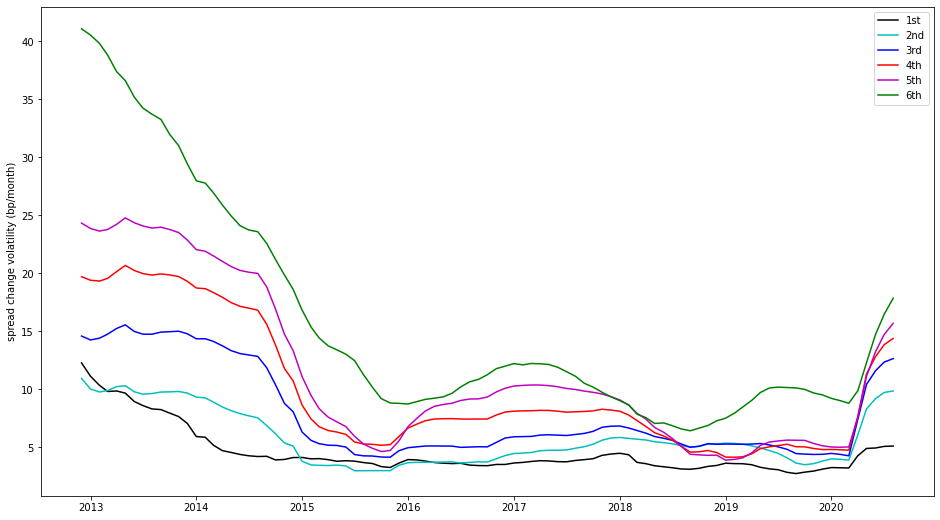

In [143]:
plt.figure(figsize = (16,9))
plt.plot(final.index,final['1st'],'k', final.index,final['2nd'],'c', final.index,final['3rd'],'b', final.index,final['4th'],'r', final.index,final['5th'],'m', final.index,final['6th'],'g')
plt.ylabel('spread change volatility (bp/month)')
plt.legend(['1st', '2nd', '3rd', '4th', '5th', '6th'])

In [135]:
standard.

{Timestamp('2010-01-01 00:00:00'): [52.91101000000001,
  67.90745000000004,
  87.53025000000002,
  121.71117999999996,
  176.49346000000003,
  953.42883],
 Timestamp('2010-01-02 00:00:00'): [53.53025000000002,
  67.91101000000003,
  87.77157999999999,
  121.90745,
  176.45117999999997,
  953.42883],
 Timestamp('2010-01-03 00:00:00'): [53.71117999999995,
  68.17242999999999,
  87.87426000000002,
  121.91101000000003,
  176.17243,
  953.42883],
 Timestamp('2010-01-04 00:00:00'): [52.79125000000002,
  67.70524999999998,
  87.54525000000002,
  122.48135000000006,
  176.51976000000002,
  1225.10525],
 Timestamp('2010-01-05 00:00:00'): [51.87629999999999,
  67.13164999999996,
  87.84147999999995,
  122.13164999999996,
  177.34677999999997,
  1228.68179],
 Timestamp('2010-01-06 00:00:00'): [48.881610000000016,
  64.49391000000003,
  86.20510000000002,
  120.49391,
  176.10481000000001,
  1228.48179],
 Timestamp('2010-01-07 00:00:00'): [48.85892999999997,
  64.82566000000003,
  87.114740000000

In [125]:
npraw[np.where((npraw > 1) & (npraw < 31))]

array([ 1.84552,  2.72552,  3.74552, ..., 30.95751, 30.97238, 30.99351])

In [128]:
for date in notebook.tqdm(to_be_plot.index):
    mycopy = np.array(usable['spread'].loc[usable['date'] == date])
    mycopy.sort()
    mycopy = mycopy[~np.isnan(mycopy)]
    
    to_be_plot['1st'].loc[to_be_plot.index == date] = mycopy[np.where(mycopy <= standard[date][0])]
    #to_be_plot['2nd'].loc[to_be_plot.index == date] = mycopy[np.where((mycopy > standard[date][0])&(mycopy <= standard[date][1]))]
    #to_be_plot['3rd'].loc[to_be_plot.index == date] = mycopy[np.where((mycopy > standard[date][1])&(mycopy <= standard[date][2]))]
    #to_be_plot['4th'].loc[to_be_plot.index == date] = mycopy[np.where((mycopy > standard[date][2])&(mycopy <= standard[date][3]))]
    #to_be_plot['5th'].loc[to_be_plot.index == date] = mycopy[np.where((mycopy > standard[date][3])&(mycopy <= standard[date][4]))]
    #to_be_plot['6th'].loc[to_be_plot.index == date] = mycopy[np.where(mycopy > standard[date][4])]
    
    
    

ValueError: cannot set using a list-like indexer with a different length than the value

In [31]:
##해당 ytm의 분위수 찾는 코드
spread_list = deepcopy(test['ytm'])
spread_list = spread_list.sort_values()
spread_list = spread_list.reset_index(drop = True)
spread_list.dropna(inplace = True)
divide_standard = []
for i in range(1,6+1): 
    idx = int(len(spread_list) / 6 * i)-1
    divide_standard.append(spread_list[idx])

In [32]:
divide_standard

[1.707, 2.045, 2.494, 2.997, 3.81, 507.9165]

In [ ]:
divide_standard = []
for i in range(1,q_value+1): 
    idx = int(len(spread_list) / q_value * i)-1
    divide_standard.append(spread_list[idx])

In [37]:
for date in crit_use['date'].unique():
    

,code,date,D,issued price,ytm,zcb maturity,spread,weight
4550492,KR3301014V23,2010-01-01,0.147246,3.000000e+10,3.210,3,82.71118,NaN
4459768,KR3202117V78,2010-01-01,0.558060,3.000000e+10,3.890,6,95.87426,NaN
26357666,KR6080611T88,2010-01-01,0.625873,4.000000e+10,5.550,9,225.90745,NaN
11863896,KR6000881TB1,2010-01-01,0.882363,5.000000e+10,5.230,12,174.91101,NaN
8863163,KR3804127T16,2010-01-01,5.406688,5.000000e+10,5.935,60,98.86420,NaN
...,...,...,...,...,...,...,...,...
36824236,KR6281922833,2020-08-31,3.224045,1.100000e+08,2.537,36,172.15849,NaN
37970306,KR632595T955,2020-08-31,4.026551,2.000000e+10,1.630,48,69.12432,NaN
22775389,KR60462929C1,2020-08-31,1.277231,1.000000e+10,2.668,18,202.62368,NaN
38048867,KR6331241986,2020-08-31,1.471359,1.673000e+11,1.208,18,56.62368,NaN


In [27]:
mydat = []

In [31]:
for date in notebook.tqdm(crit_table.index.get_level_values('date').unique()):
    mydat.append(crit_use.loc[pd.IndexSlice[:, str(date)], pd.IndexSlice['spread']])

KeyboardInterrupt: 

In [32]:
mydat

""


# Absolute & Relative Spread Change Volatility of Investment grade universe
## (Exhibit 3) 
### trailing 36 month ('10.1.4. ~ '20.8.20.)

* moving standard deviation of 36 months

In [8]:
daily = pd.read_csv('invest_spread.csv', index_col='date')
daily.index = pd.to_datetime(daily.index)

In [9]:
month = daily.resample('MS').first()

In [10]:
absolute = []
for i in range(len(month.index)-1):
    absolute.append(month.iloc[i+1]-month.iloc[i])

absolute = pd.DataFrame(absolute)

In [11]:
absolute.loc['last'] = 1
absolute = absolute.shift(1)
absolute.index = month.index

In [12]:
abv = absolute.rolling(36).std()

In [13]:
relative = month.pct_change()*100

In [14]:
rev = relative.rolling(36).std()

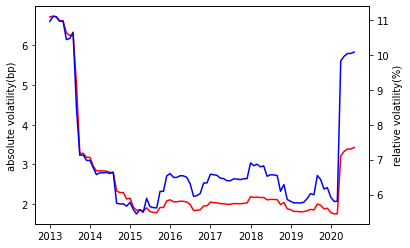

In [15]:
fig, ax1 = plt.subplots()
ax1.set_ylabel('absolute volatility(bp)')
ax1.plot(absolute.index, abv, color = 'red')

ax2 = ax1.twinx()
ax2.set_ylabel('relative volatility(%)')
ax2.plot(relative.index, rev, color = 'blue')
plt.show()

# Average Spreads and Spread Changes for Large Issuers in the ' ' sector
# (Exhibit 5)
## (Jan 2010)

# Regression Estimates of Various Models of Spread change - Exhibit5에서 사용한 sector
# (Exhibit 6)